In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from functools import lru_cache

In [3]:
#print('Hola')

# How to find the roots of a polynomial 

In [4]:
#def const_coeff(z, rho_r, rho_m, lamb):
#    return -(lamb + rho_r * (1 + z) ** 4 + rho_m * (1 + z) ** 3) / 3

def const_coeff(z, beta, cosmo_params):
    om_m, h = cosmo_params
    Gnew = 6.67e-11
    kappa = 8*np.pi*Gnew
    om_r = 8e-5
    om_l = 1-om_m-om_r
    return -(100*h)**2*(1+16*beta*kappa*(100*h)**4)*(om_m*(1+z)**3+om_r*(1+z)**4+om_l)

def sixth_coeff(beta):
    Gnew = 6.67e-11
    kappa = 8*np.pi*Gnew
    return 16 * kappa * beta

In [5]:
@lru_cache(maxsize=1024**2)
def hubble_6(z,beta,cosmo_params):

#def hubble(z, rho_r, rho_m, lamb, kappa, beta):
    """
    
    """
    h, om_m = cosmo_params
    
    Gnew = 6.67e-11
    kappa = 8*np.pi*Gnew
    om_r = 8e-5
    om_l = 1-om_m-om_r
    
    coeff6 = sixth_coeff(beta)
    coeff0 = const_coeff(z, beta, cosmo_params)
    
    poly_coeffs = (coeff6, 0, 0, 0, 1, 0, coeff0)
    hubble_poly_roots = roots(poly_coeffs)
    
    roots_cond = logical_and(absolute(hubble_poly_roots.imag) <= 1e-20, hubble_poly_roots.real >= 0)
#     hubble_poly_roots[roots_cond].real >= 0
    
    return hubble_poly_roots[roots_cond].real

In [6]:
hubble_6(1,1e-8,(1,0))

array([ 0.,  0.])

In [7]:

#rho_r = 8.4e-5
#rho_m = 0.3098
#lamb =  0.691016 
#kappa = 8*np.pi
#beta = 0


red_shift = 0
beta_0 = 0
OmegaM = 0.3089
h0 = 0.8
cosmoparams = (OmegaM, h0)
#hubble(red_shift, beta_0, cosmoparams), hubble_6(red_shift, beta_0, cosmoparams)

In [8]:
rho_r = 1e-5
rho_m = 0.3
lamb = 0.7
Gnew = 1
kappa = 8*np.pi*Gnew

beta_0 = 0
beta_1 = 1e-7

red_shift_array = geomspace(1e-2, 5, 2048)
hubble_array_0 = []
for red_shift in red_shift_array:
    hv = hubble(red_shift, rho_r, rho_m, lamb, kappa, beta_0)
    hubble_array_0.append(hv)
    
hubble_array_1 = []
for red_shift in red_shift_array:
    hv = hubble(red_shift, rho_r, rho_m, lamb, kappa, beta_1)
    hubble_array_1.append(hv)

NameError: name 'hubble' is not defined

ValueError: x and y must have same first dimension, but have shapes (2048,) and (0,)

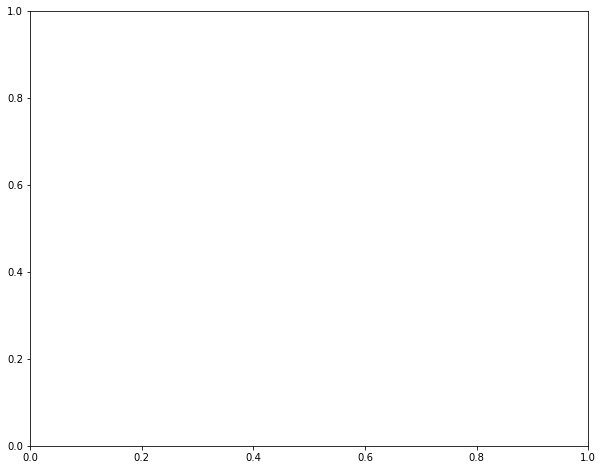

In [9]:
figure(figsize=(10, 8))

plot(red_shift_array, hubble_array_0, lw=4, alpha=0.5)
plot(red_shift_array, hubble_array_1, lw=4, ls='--')

z = red_shift_array
hubble_base = sqrt((lamb + rho_r * (1 + z) ** 4 + rho_m * (1 + z) ** 3) / 3)

plot(red_shift_array, hubble_base, lw=4, ls='--')
xlabel('z')
ylabel('H(z)')
#xscale('log')
#yscale('log')